### Sentiment analysis on twitter comments.

[dataset link](https://drive.google.com/file/d/12uAdA8VOkFbjXFJfgNfLtQzK-DvMznKJ/view?usp=sharing)


install necessary libraries

In [ ]:
!pip install pandas matplotlib tensorflow

download the dataset( dataset taken here is for twitter)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/Tweets.csv")

In [ ]:
print(df)

                 tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \

In [ ]:
review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [ ]:
review_df["airline_sentiment"].value_counts() #check the values of airline sentiment column


negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

factorise method - converting the categorical values into numeric values so that the machine can understand.

In [ ]:
sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [ ]:
tweet = review_df.text.values

tokenization: breaking down all the parts of text into small parts called tokens.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)

tokenizer.fit_on_texts(tweet)

fit on texts in converted into texts to sequenence.

In [ ]:
encoded_docs = tokenizer.texts_to_sequences(tweet) #words which were replaced are assigned with their numbers using text_to_sequence()method/

sentences in dataset maynot be of equal length so use padding to pad the sentences to have equal lengths.

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

build a lstm (long short text memory) a variant of rnn(recurrent neural netwroks)

#Spatial drop out:
type of drop out used in cnn.

# What actually is dropout?
technique that randomly drops out some elements of a layer during training. this widely helps the model to overcome the problem of overfitting.

# What is overfitting?
it is the case when machine or model learns well from the training data, but will be unable to generalize to any new data provided.
methods followed to overcome this drawback is:
 1. regularization
 2. data augmentation(refers to the altering or modifying the data interms of different parameters).
 3. early stopping ( it refers to stopping the training process before the model starts to verfit the data.)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
vocab_size = 13234    # this changed the final results(graphs) of exsisting ones
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size,embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
________________________________________________

train your model now

epoches refers to one completete pass through the entire dataset.
this means that the model sees the everydata point in the training dataset once.
no of epochs is a hyperparameter that can be tuned to improve the perforamnce of the model.

note: once ur model starts to overfit see through u reduce the number of epochs or use techniques to prevent overfitting.

In [ ]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 95s 311ms/step - loss: 0.3975 - accuracy: 0.8347 - val_loss: 0.2924 - val_accuracy: 0.9138
Epoch 2/5
289/289 [==============================] - 87s 302ms/step - loss: 0.2188 - accuracy: 0.9156 - val_loss: 0.1664 - val_accuracy: 0.9385
Epoch 3/5
289/289 [==============================] - 87s 301ms/step - loss: 0.1622 - accuracy: 0.9417 - val_loss: 0.1663 - val_accuracy: 0.9389
Epoch 4/5
289/289 [==============================] - 87s 302ms/step - loss: 0.1391 - accuracy: 0.9495 - val_loss: 0.1720 - val_accuracy: 0.9433
Epoch 5/5
289/289 [==============================] - 87s 301ms/step - loss: 0.1159 - accuracy: 0.9570 - val_loss: 0.1844 - val_accuracy: 0.9450


plot the data using matplotlib

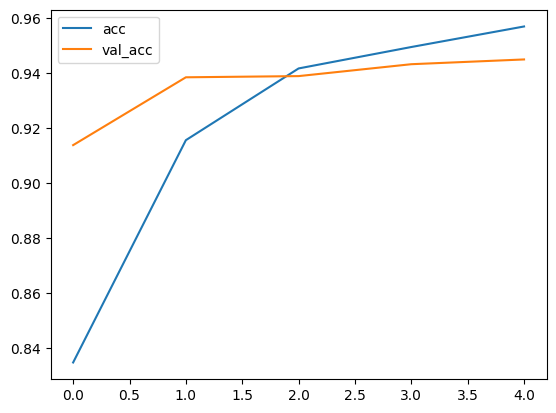

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

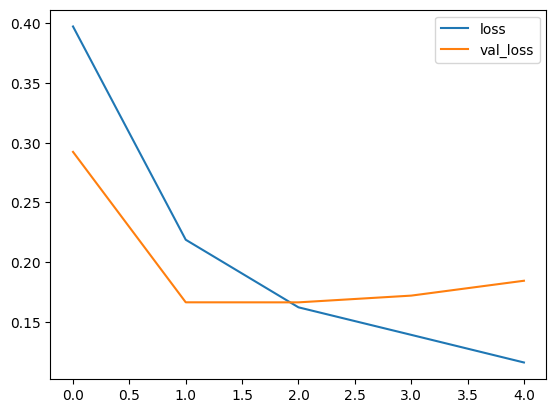

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

give your statements and check for the tone of the comment

In [ ]:
#executing the model
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])


test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "bags were not proper they were torn while receiving us."
predict_sentiment(test_sentence2)

test_sentence3 = "one of the best flight i had ever."
predict_sentiment(test_sentence3)



1/1 [==============================] - 0s 361ms/step
Predicted label:  positive
1/1 [==============================] - 0s 74ms/step
Predicted label:  negative
1/1 [==============================] - 0s 78ms/step
Predicted label:  positive


In [ ]:
test_sentence4 = ""
predict_sentiment(test_sentence3)